In [16]:
#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error,r2_score

In [17]:
#Importing the dataset
sp=pd.read_csv("C:/Users/Abhishek Wagh/Desktop/MTech_Project/Sugarcane/Phase1/csv/SurfacePressure/surfacepressure.csv")

In [18]:
sp

,Year,Month,sp_past,sp_pasttopast,surfacepressure
0,2002,1,94.28,94.34,94.40
1,2002,2,94.20,94.16,94.45
2,2002,3,94.11,94.10,94.14
3,2002,4,94.00,93.86,93.94
4,2002,5,93.80,93.82,93.82
...,...,...,...,...,...
211,2019,8,93.78,93.75,93.75
212,2019,9,94.07,93.94,93.94
213,2019,10,94.28,94.08,94.08
214,2019,11,94.41,94.31,94.31


In [19]:
sp.shape

(216, 5)

In [20]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 5 columns):
Year               216 non-null int64
Month              216 non-null int64
sp_past            216 non-null float64
sp_pasttopast      216 non-null float64
surfacepressure    216 non-null float64
dtypes: float64(3), int64(2)
memory usage: 8.6 KB


In [21]:
#Creating correlation matrix for precipitation
corr_matrix=sp.corr()
corr_matrix

,Year,Month,sp_past,sp_pasttopast,surfacepressure
Year,1.000000,0.000000,0.040462,0.055817,0.036884
Month,0.000000,1.000000,-0.016185,-0.018275,-0.033345
sp_past,0.040462,-0.016185,1.000000,0.943674,0.942742
sp_pasttopast,0.055817,-0.018275,0.943674,1.000000,0.942395
surfacepressure,0.036884,-0.033345,0.942742,0.942395,1.000000


In [22]:
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

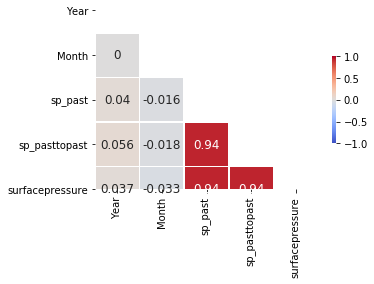

In [23]:
f, ax = plt.subplots(figsize=(5, 4)) 
heatmap = sns.heatmap(corr_matrix, mask = mask,square = True,linewidths = .5, cmap = 'coolwarm', cbar_kws = {'shrink': .4, 'ticks' : [-1, -.5, 0, 0.5, 1]},vmin = -1, vmax = 1,annot = True,annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [24]:
sp=sp.drop(['Month'],axis=1)

In [25]:
sp.shape

(216, 4)

In [26]:
X=sp.drop('surfacepressure',axis=1)
y=sp.surfacepressure

In [27]:
X

,Year,sp_past,sp_pasttopast
0,2002,94.28,94.34
1,2002,94.20,94.16
2,2002,94.11,94.10
3,2002,94.00,93.86
4,2002,93.80,93.82
...,...,...,...
211,2019,93.78,93.75
212,2019,94.07,93.94
213,2019,94.28,94.08
214,2019,94.41,94.31


In [28]:
y

0      94.40
1      94.45
2      94.14
3      93.94
4      93.82
       ...  
211    93.75
212    93.94
213    94.08
214    94.31
215    94.44
Name: surfacepressure, Length: 216, dtype: float64

In [29]:
X.shape

(216, 3)

In [30]:
y.shape

(216,)

In [31]:
#Creating Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [32]:
X_train,y_train=np.array(X_train),np.array(y_train)

### Linear Regressor

In [33]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [34]:
li=LinearRegression()

In [35]:
li.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
#Prediction of values
Lir_ypred= li.predict(X_test)
Lir_ypred

array([94.34110347, 93.68165416, 94.07812043, 94.37940323, 94.28442377,
       94.16279862, 94.13854614, 93.80454618, 93.77916608, 93.97697848,
       94.14056347, 93.79517737, 94.22515572, 94.25861955, 93.66967373,
       94.20338238, 94.42573212, 93.83595499, 93.72924992, 93.87032802,
       94.29838512, 93.66011107, 94.01273943, 94.34003682, 93.71688178,
       94.29190137, 94.18621471, 94.35524176, 93.99701936, 94.2250296 ,
       94.11889933, 94.22852585, 93.64062172, 94.31305166, 94.35190803,
       93.72098417, 93.69562864, 94.10528253, 94.32795354, 94.2428034 ,
       94.35775601, 94.33978836, 94.39721344, 93.99661345])

In [37]:
#print('Mean Absolute Error:',mean_absolute_error(y_test,Lir_ypred))
print('Mean squared Error:',mean_squared_error(y_test,Lir_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,Lir_ypred)))
#print('R2_Score:',r2_score(y_test,Lir_ypred))

Mean squared Error: 0.008807452361927124
Root Mean Squared Error: 0.0938480280129909


In [38]:
linear_r2_score=r2_score(y_test,Lir_ypred)
linear_r2_score

0.9011822631591073

### Lasso Regressor

In [39]:
#Lasso Regressor
lass=Lasso(alpha=0.0001)
lass.fit(X_train,y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [40]:
Lass_ypred= lass.predict(X_test)

In [41]:
print('Mean squared Error:',mean_squared_error(y_test,Lass_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,Lass_ypred)))
#print('R2_Score:',r2_score(y_test,Lass_ypred))

Mean squared Error: 0.00883311581728748
Root Mean Squared Error: 0.09398465735048184


In [42]:
lasso_r2_score=r2_score(y_test,Lass_ypred)
lasso_r2_score

0.9008943246640675

### Ridge Regressor

In [43]:
#RIdge
rid=Ridge(alpha=0.0001)
rid.fit(X_train,y_train)

Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [44]:
rid_ypred= rid.predict(X_test)

In [45]:
print('Mean squared Error:',mean_squared_error(y_test,rid_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,rid_ypred)))
#print('R2_Score:',r2_score(y_test,rid_ypred))

Mean squared Error: 0.008807517860510204
Root Mean Squared Error: 0.09384837697323382


In [46]:
ridge_r2_score=r2_score(y_test,rid_ypred)
ridge_r2_score

0.9011815282789762

### Decision Tree Regressor

In [47]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [48]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [49]:
dt_ypred= dt.predict(X_test)

In [50]:
print('Mean squared Error:',mean_squared_error(y_test,dt_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,dt_ypred)))
#print('R2_Score:',r2_score(y_test,dt_ypred))

Mean squared Error: 0.014102272727272719
Root Mean Squared Error: 0.11875299039296955


In [51]:
decisiontree_r2_score=r2_score(y_test,dt_ypred)
decisiontree_r2_score

0.8417755080633538

### KNeighbour Regressor

In [52]:
from sklearn.neighbors import KNeighborsRegressor

kn=KNeighborsRegressor(n_neighbors=2)
kn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [53]:
kn1_pred=kn.predict(X_test)

In [54]:
print('Mean squared Error:',mean_squared_error(y_test,kn1_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,kn1_pred)))
#print('R2_Score:',r2_score(y_test,kn1_pred))

Mean squared Error: 0.019273295454545123
Root Mean Squared Error: 0.13882829486291734


In [55]:
kneighbour_r2_score=r2_score(y_test,kn1_pred)
kneighbour_r2_score

0.7837577360603188

### SVR Regressor

In [56]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf')
svr.fit(X_train,y_train)
svr_pred=svr.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [57]:
print('Mean squared Error:',mean_squared_error(y_test,svr_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,svr_pred)))
#print('R2_Score:',r2_score(y_test,svr_pred))

Mean squared Error: 0.011274918686060287
Root Mean Squared Error: 0.10618342001489821


In [58]:
svr_r2_score=r2_score(y_test,svr_pred)
svr_r2_score

0.8734978173214003

### Random Forest Regressor

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train);

In [61]:
rf_pred=rf.predict(X_test)

In [62]:
print('Mean squared Error:',mean_squared_error(y_test,rf_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,rf_pred)))
#print('R2_Score:',r2_score(y_test,rf_pred))

Mean squared Error: 0.011056979545453472
Root Mean Squared Error: 0.10515217327974478


In [63]:
randomforest_r2_score=r2_score(y_test,rf_pred)
randomforest_r2_score

0.8759430479918393

### Bayes Regressor

In [64]:
from sklearn.linear_model import BayesianRidge
br=BayesianRidge()
br.fit(X_train,y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [65]:
br_pred=br.predict(X_test)

In [66]:
print('Mean squared Error:',mean_squared_error(y_test,br_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,br_pred)))
print('R2_Score:',r2_score(y_test,br_pred))

Mean squared Error: 0.008836949550165984
Root Mean Squared Error: 0.09400505066306801
R2_Score: 0.9008513109989191


In [67]:
bayes_r2_score=r2_score(y_test,br_pred)
bayes_r2_score

0.9008513109989191

In [68]:
Regressors=['Linear','Lasso','Ridge','DecisionTree','KNeighbour','SVR','RandomForest','Bayesian']
R2_Score=[linear_r2_score,lasso_r2_score,ridge_r2_score,decisiontree_r2_score,kneighbour_r2_score,svr_r2_score,randomforest_r2_score,bayes_r2_score]

No handles with labels found to put in legend.


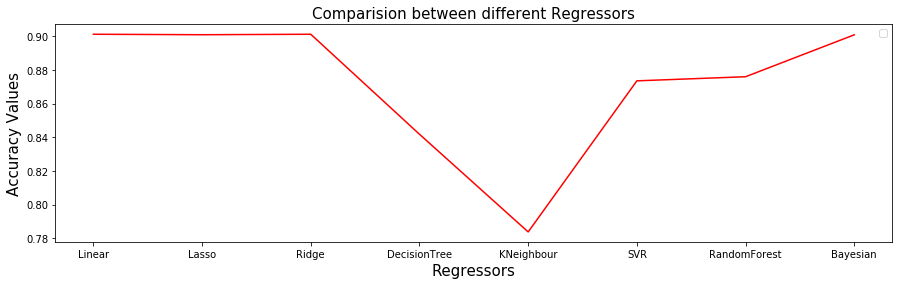

In [69]:
plt.figure(figsize=(15,4))
plt.plot(Regressors,R2_Score, color = 'Red')

plt.title('Comparision between different Regressors',fontsize=15)
plt.xlabel('Regressors',fontsize=15)
plt.ylabel('Accuracy Values',fontsize=15)
plt.legend()
plt.show()


## Linear Regressor is sutaible for Surface Pressure with accuracy of 90.11% followed by Ridge Regressor with accuracy of 90%

In [70]:
sp2020=pd.read_csv("C:/Users/Abhishek Wagh/Desktop/MTech_Project/Sugarcane/Phase1/csv/SurfacePressure/surfacepressure2020.csv")

In [71]:
sp2020=sp2020.drop(['Month'],axis=1)

In [72]:
sp2020=sp2020.iloc[:,:].values

In [73]:
sp2020

array([[2020.  ,   94.47,   94.35],
       [2020.  ,   94.44,   94.39],
       [2020.  ,   94.16,   94.18],
       [2020.  ,   94.03,   94.  ],
       [2020.  ,   93.89,   93.83],
       [2020.  ,   93.73,   93.66],
       [2020.  ,   93.75,   93.64],
       [2020.  ,   93.75,   93.78],
       [2020.  ,   93.94,   94.07],
       [2020.  ,   94.08,   94.28],
       [2020.  ,   94.31,   94.41],
       [2020.  ,   94.44,   94.47]])

In [74]:
sp2020_pred=[]

In [75]:
#Using Kneighbour regressor for prediction
sp2020_pred=li.predict(sp2020)

In [76]:
sp2020_pred

array([94.39348056, 94.39712243, 94.16563414, 94.0206111 , 93.875285  ,
       93.72025063, 93.72085676, 93.78457174, 94.00878137, 94.17231175,
       94.3431208 , 94.43353099])

In [77]:
sp_data=pd.DataFrame(data=sp2020_pred)
sp_data

,0
0,94.393481
1,94.397122
2,94.165634
3,94.020611
4,93.875285
5,93.720251
6,93.720857
7,93.784572
8,94.008781
9,94.172312


In [78]:
#Exporting the predictions of 2020 into csv file
sp_data.to_csv(r"C:\Users\Abhishek Wagh\Desktop\MTech_Project\Sugarcane\Phase1\csv\SurfacePressure\2020surfacepressure.csv")
